# Part 1: Basic Plotting

In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)

import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shply
import numpy as np
print(gpd.__version__)  # note this is a pretty old version

0.3.0


In [2]:
gdf = gpd.read_file('hffi_data_FY20122018_geocoded_final.csv')
print(len(gdf))
gdf.head()
#gdf.columns

861


,field_1,year,org_id,loan_amt,entity_structure,structure_edit,total_proj_cost,loan_pct,food_desert,food_desert_2,hffi_year,proj_desc,bus_type,activity,activity_2,activity_3,activity_other,latitude,longitude,street,address_2,city,state,zipcode,zipcode_4,fips,address,location,point,lat,long,alt,field_33,geometry
0,0,2018,448,2892723,,,14500000,0.2,OTHER,The Food Trust,2014,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,42.086,-71.024,,,,,,,,"139 Pleasant St,Brockton,MA,02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.08608291,-71.02394909,0,FALSE,None
1,1,2018,448,3300000,,,6050000,0.55,OTHER,The Food Trust,2013,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,42.086,-71.024,,,,,,,,"139 Pleasant St,Brockton,MA,02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.08608291,-71.02394909,0,,None
2,2,2018,448,3000000,,,22400000,0.13,ERS,,2016,Renovated building houses Fresh Grocer brand g...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,40.003,-75.215,,,,,,,,"4105 Monument Rd,Philadelphia,PA,19131","4105, Monument Road, Pencoyd, Philadelphia, Ph...","(40.00174615151515, -75.21529207575757, 0.0)",40.00174615,-75.21529208,0,,None
3,3,2018,448,750000,,,750000,1,OTHER,The Food Trust,2014,Acquisition and build-out of commercial traini...,NONRETAIL,PRODUCTION,Production,Production and Distribution,,42.332,-71.082,,,,,,,,"2117 Washington St,Boston,MA,02119","2117, Washington Street, Roxbury Crossing, Sou...","(42.33191704347826, -71.08190847826087, 0.0)",42.33191704,-71.08190848,0,,None
4,4,2018,502,54000,FORPROFIT,Forprofit,81000,0.67,OTHER,CIMS/ERS (<120% adj.,2017,Grocery Store,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,40.03579771,-76.31409186,252 S 4th St,,Reading,PA,19602,,42011002500,"252 S 4th St,Reading,PA,19602","252, South 4th Street, Reading, Berks County, ...","(40.33143120408163, -75.93009128571428, 0.0)",40.3314312,-75.93009129,0,,None


In [3]:
print('\nSo our "geometry" column is a ', type(gdf.geometry))
print('\nInside that column, we have many ', type(gdf.geometry[0]))
len(gdf)


So our "geometry" column is a  <class 'geopandas.geoseries.GeoSeries'>

Inside that column, we have many  <class 'NoneType'>


861

In [4]:
print('\nSo our "geometry" column is a ', type(gdf.lat))
print('\nInside that column, we have many ', type(gdf.lat[0]))


So our "geometry" column is a  <class 'pandas.core.series.Series'>

Inside that column, we have many  <class 'str'>


In [5]:
gdf['float_lat'] = pd.to_numeric(gdf['lat'], downcast='float')
gdf['float_long'] = pd.to_numeric(gdf['long'], downcast='float')

#Some fancy looping to populate our 'geometry' column
gdf['geometry'] = [shply.geometry.point.Point(xy) for xy in zip(gdf['float_long'], gdf['float_lat'])]

# Coordinate reference system : WGS84
gdf.crs = {'init': 'epsg:4269'}

print('\nSo now our "geometry" column is still a ', type(gdf.geometry))
print('\n.....But inside that column, we have many ', type(gdf.geometry[0]))




So now our "geometry" column is still a  <class 'geopandas.geoseries.GeoSeries'>

.....But inside that column, we have many  <class 'shapely.geometry.point.Point'>


In [6]:
gdf.head()

,field_1,year,org_id,loan_amt,entity_structure,structure_edit,total_proj_cost,loan_pct,food_desert,food_desert_2,hffi_year,proj_desc,bus_type,activity,activity_2,activity_3,activity_other,latitude,longitude,street,address_2,city,state,zipcode,zipcode_4,fips,address,location,point,lat,long,alt,field_33,geometry,float_lat,float_long
0,0,2018,448,2892723,,,14500000,0.2,OTHER,The Food Trust,2014,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,42.086,-71.024,,,,,,,,"139 Pleasant St,Brockton,MA,02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.08608291,-71.02394909,0,FALSE,POINT (-71.02394866943359 42.08608245849609),42.086082,-71.023949
1,1,2018,448,3300000,,,6050000,0.55,OTHER,The Food Trust,2013,Acquisition and predevelopment of vacant site ...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,42.086,-71.024,,,,,,,,"139 Pleasant St,Brockton,MA,02301","139, Pleasant Street, Montello, Brockton, Plym...","(42.086082909090905, -71.0239490909091, 0.0)",42.08608291,-71.02394909,0,,POINT (-71.02394866943359 42.08608245849609),42.086082,-71.023949
2,2,2018,448,3000000,,,22400000,0.13,ERS,,2016,Renovated building houses Fresh Grocer brand g...,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,40.003,-75.215,,,,,,,,"4105 Monument Rd,Philadelphia,PA,19131","4105, Monument Road, Pencoyd, Philadelphia, Ph...","(40.00174615151515, -75.21529207575757, 0.0)",40.00174615,-75.21529208,0,,POINT (-75.21529388427734 40.00174713134766),40.001747,-75.215294
3,3,2018,448,750000,,,750000,1,OTHER,The Food Trust,2014,Acquisition and build-out of commercial traini...,NONRETAIL,PRODUCTION,Production,Production and Distribution,,42.332,-71.082,,,,,,,,"2117 Washington St,Boston,MA,02119","2117, Washington Street, Roxbury Crossing, Sou...","(42.33191704347826, -71.08190847826087, 0.0)",42.33191704,-71.08190848,0,,POINT (-71.0819091796875 42.33191680908203),42.331917,-71.081909
4,4,2018,502,54000,FORPROFIT,Forprofit,81000,0.67,OTHER,CIMS/ERS (<120% adj.,2017,Grocery Store,RETAIL,GROCERYSTORE,Grocery Store,Grocery Store,,40.03579771,-76.31409186,252 S 4th St,,Reading,PA,19602,,42011002500,"252 S 4th St,Reading,PA,19602","252, South 4th Street, Reading, Berks County, ...","(40.33143120408163, -75.93009128571428, 0.0)",40.3314312,-75.93009129,0,,POINT (-75.93009185791016 40.3314323425293),40.331432,-75.930092


In [7]:
#%%capture
!pip install geoplot;

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import geoplot
outlines = gpd.read_file('zip://cb_2016_us_state_500k.zip')
outlines.head()

#for now, lets take only look at the contiguous US
contiguous = outlines.loc[~outlines['STUSPS'].isin(['AK','FM','MH','MP','PR','PW','AS','HI','GU','UM','VI'])]
outlines.STUSPS

#len(contiguous) #we have 50 states now
print(contiguous.crs)
print(gdf.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


In [9]:
len(contiguous)
#we should have 48 states -- + DC

49

In [10]:
contiguous.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3..."


In [11]:
contiguous.NAME

0                  Alabama
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Georgia
11                   Idaho
12                Illinois
13                 Indiana
14                    Iowa
15                  Kansas
16                Maryland
17               Minnesota
18             Mississippi
19                 Montana
20                  Nevada
21              New Jersey
22              New Mexico
23            North Dakota
24                Oklahoma
25            Pennsylvania
26          South Carolina
27            South Dakota
28                    Utah
29                 Vermont
30           West Virginia
31                 Wyoming
34                 Florida
35                Kentucky
36               Louisiana
37                   Maine
38           Massachusetts
39                Michigan
40                Missouri
4

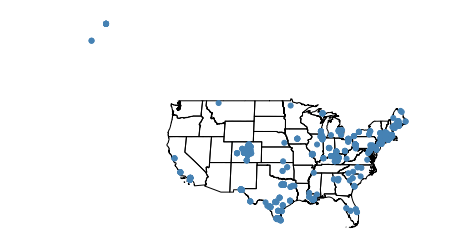

In [12]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson())
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())


#Overlay the points
geoplot.pointplot(gdf,
                  ax = ax)  # add it to the axes created above

plt.show()

In [13]:
gdf = gdf.loc[gdf['state']!="AK"]

# Part 2: Advanced Mapping 

Basic map achieved, adding some basic elements

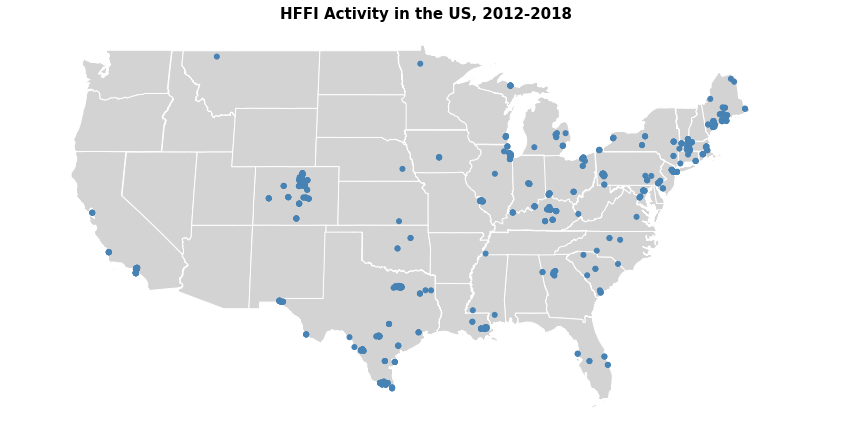

In [46]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15),zorder=-1,
    linewidth=1,
    edgecolor='white',
    facecolor='lightgray',)
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())


#Overlay the points
geoplot.pointplot(gdf,
                  ax = ax)  # add it to the axes created above

plt.title('HFFI Activity in the US, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

#### Projects by type of activity

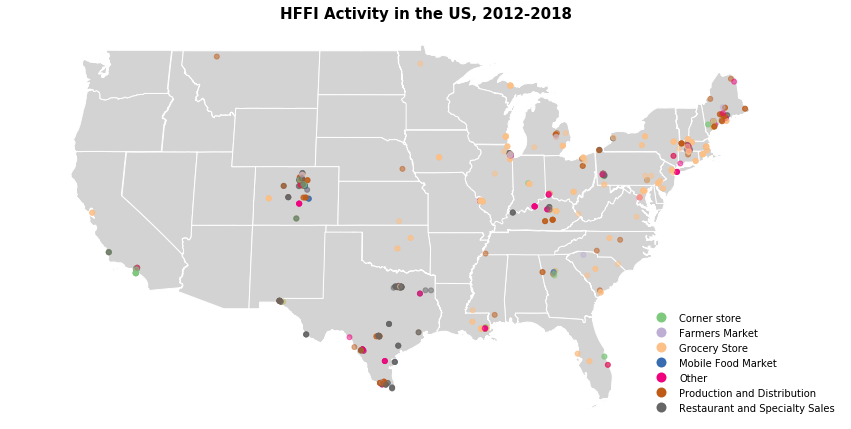

In [66]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15),zorder=-1,
    linewidth=1,
    edgecolor='white',
    facecolor='lightgray',)
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())

geoplot.pointplot(gdf,
                  ax = ax, hue='activity_3', alpha=0.5, legend=True,
                    legend_kwargs={'frameon': False, 'loc': 'lower right'},
                 cmap='Accent',) 

## Trying real darn hard to get the color scheme to be categorical. Tried couple different ways to no avail. 
## in an ideal world would also change the background map to be more neutral; grey filling and white boundaries
## maybe for example.

plt.title('HFFI Activity in the US, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

For colormap guidance, went to https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Qualitative color schemes: 
'Qualitative' = 'Pastel1', -- too light

'Pastel2'-- too light
'Paired', -- cannot distinguish between three and four

'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

For legend and other mapping support, went to https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html

# Projects by dollar amount

In [ ]:
type(outlines)
outlines.geometry

# A polyplot shows simple shapes. The default settings are pretty nice looking.

ax = geoplot.polyplot(contiguous, projection=geoplot.crs.Robinson(), figsize=(15,15))
#ax = geoplot.webmap(contiguous, projection=geoplot.crs.WebMercator())

geoplot.pointplot(gdf,
                  ax = ax, hue='loan_amt', alpha=0.5, legend=True) 


plt.title('HFFI Loan Size, 2012-2018', fontsize=15,fontweight='bold')

plt.show()

# Grouping Data

Going back a couple steps to see if I can get counts of project 1. by state, 2. by CDFI 

In [ ]:
gdf.columns

In [ ]:
#gdf.head()

#obDF.duplicated(['TractFIPS'], keep='first')])

#gdf.groupby('state')['state'].value_counts()

duplicateSeries = gdf.duplicated(['lat','long'], keep='first')
gdf['isDuplicate'] = duplicateSeries

uniqueProjDF = gdf.loc[gdf.isDuplicate == False].copy()

print(type(uniqueProjDF))
# #uniqueProjDF.groupby('state')['state'].value_counts().to_csv('out.txt', index=True)
uniqueProjDF.groupby('state')['state'].value_counts()
# #gdf.groupby('state').describe()

In [ ]:
##early efforts

#df_state = gdf.groupby('state')
#type(df_state)

# I don't know exactly that this did anything at all.

In [ ]:
# df_state_count = contiguous
#df_state_count.head(10)

# df_state_count = df_state.count

### would it work instead to add to the MAP data -- the continguous map we use -- the count information? 
## problem is that I replaced all data, for all columns. 

## I think I need to start wit the contiguous map, which has geographic information, and add a column there 

# I need to match it by column STUSPS (contiguous) and state

In [ ]:
#Going to try to rename a column
contiguous.rename(columns={'STUSPS':'state'}, inplace=True)

In [ ]:
contiguous.head()

In [ ]:
## learning from python notebooks

#household_totals = households.groupby('building_id').median()
#extended_buildings = pd.merge(buildings, household_totals, on='building_id', how='left')
#extended_buildings.head()

proj_count = gdf.groupby('state').count()
proj_count.head()

In [ ]:
state_count = pd.merge(contiguous, proj_count, on='state', how='left')
state_count.head()

In [ ]:
state_count.rename(columns={'geometry_x':'geometry'}, inplace=True)

state_count.head(50)

In [ ]:
# Going to try to replace NaN with Zeros
state_count['counts'] = state_count['field_1'].fillna(0)

We downloaded these results as CSV to create tables that show the number of unique projects funded in each state, and the number of total projects funded by state. 

As it turns out, the loans by state data could actually be more interesting as a chloropleth map. Can try that. 

In [ ]:
type(outlines)
outlines.geometry

ax2 = geoplot.choropleth(
    state_count, projection=geoplot.crs.Robinson(), figsize=(15,15), 
    hue = 'counts', cmap='Greens', legend_kwargs={'orientation': 'horizontal'},edgecolor ='white', linewidth=1, legend=True)

plt.title('Project Count by State', fontsize=15,fontweight='bold')

#it's not the chloropleth map I wanted... 
#ideally would get this: gdf.groupby('state')['state'].value_counts() data to be mapped. 
#to create a new column, and then use that data.

plt.show()

In [ ]:
## VERY HAPPY WITH MAP 

#now trying to get it to categorize in another way

#scheme = mc.Quantiles(state_count.field_1, k=4)
#gplt.choropleth(
#    state_count, hue='field_1', linewidth=0, scheme=scheme, ax=axarr[0][1]
#)
#axarr[0][1].set_title('scheme="Quantiles"', fontsize=18)

ax2 = geoplot.choropleth(
    state_count, projection=geoplot.crs.Robinson(), figsize=(15,15), 
    hue = 'field_1',
    scheme=scheme,
    edgecolor ='white', linewidth=1, legend=True)

plt.title('Project Count by State', fontsize=15,fontweight='bold')

#it's not the chloropleth map I wanted... 
#ideally would get this: gdf.groupby('state')['state'].value_counts() data to be mapped. 
#to create a new column, and then use that data.

plt.show()

In [ ]:
state_count.head(15)

In [ ]:
## Do the same thing for org id to see by CDFI

## need to do a new groupby with org_id. 

## want to improve this notebook by figuring out how to do the fine to co

# Back to Income Data intent

Did not continue with this effort in Python and used excel instead

In [ ]:
type(gdf.loan_amt)

In [ ]:
gdf['loan_amt'].dtype

In [ ]:
gdf['loan_amt_float'] = gdf['loan_amt'].astype('float')

In [ ]:
gdf['loan_amt_float'].plot.hist()
#error message I'm receiving; no numerical data to plot
#gdf.loan_amt_float[0]
#gdf['loan_amt_float']

In [ ]:
import seaborn as sns
sns.set()  # activate the Seaborn aesthetic defaults

In [ ]:
data = gdf.loc[(gdf['activity'] == "GROCERYSTORE") & 
                 (gdf.loan_amt_float <= 200000000)]

ax = sns.distplot(a = data.loan_amt_float,
                  bins = 10,
                  color = 'orange',
                  kde = False)

ax.set_title('Loan Amount for Grocery Stores')

plt.show()

## works, but I can't get the x tick labels to be at an angle to be readable. Tried variations on this: 
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Goal is to create 5 categories: 
- $0 to $250,000 loans
- $250,000 to $500,000 loans
- $500,000 to $1M
- $1m t0 $2M
- Above $2M